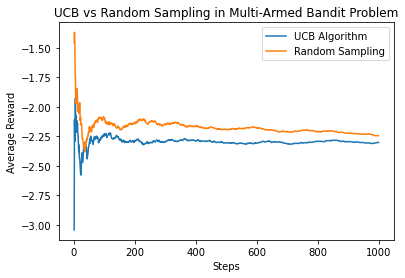

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Upper Confidence Bound (UCB) algorithm
def ucb_bandit(arms, num_steps, c):
    num_arms = len(arms)
    q_values = np.zeros(num_arms)
    n_pulls = np.zeros(num_arms)
    total_reward_ucb = 0
    rewards_ucb = []
    for t in range(1, num_steps + 1):
        # UCB action selection
        ucb_values = q_values + c * np.sqrt(np.log(t) / (n_pulls + 1e-5))
        action = np.argmax(ucb_values)
        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_ucb += reward
# Update Q-values and counts
        n_pulls[action] += 1
        q_values[action] += (reward - q_values[action]) / n_pulls[action]
        rewards_ucb.append(total_reward_ucb / t)
    return rewards_ucb
# Random sampling algorithm
def random_bandit(arms, num_steps):
    total_reward_random = 0
    rewards_random = []
    for t in range(1, num_steps + 1):
        # Random action selection
        action = np.random.choice(len(arms))
        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_random += reward
        rewards_random.append(total_reward_random / t)
    return rewards_random
# Example usage
def main():
    num_arms = 5
    true_means = np.random.normal(0, 1, num_arms)
    arms = [lambda: np.random.normal(true_means[i], 1) for i in range(num_arms)]
    num_steps = 1000
    c = 2.0
    ucb_rewards = ucb_bandit(arms, num_steps, c)
    random_rewards = random_bandit(arms, num_steps)
    # Plot results
    plt.plot(range(1, num_steps + 1), ucb_rewards, label='UCB Algorithm')
    plt.plot(range(1, num_steps + 1), random_rewards, label='Random Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('UCB vs Random Sampling in Multi-Armed Bandit Problem')
    plt.show()
if __name__ == "__main__":
    main()